In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('hr_dashboard_data.csv')
df.head()

,Name,Age,Gender,Projects Completed,Productivity (%),Feedback Score,Department,Position,Joining Date,Salary,Satisfaction Rate (%)
0,Douglas Lindsey,25,Male,11,57,2.8,Marketing,Analyst,Jan-20,63596,45
1,Anthony Roberson,59,Female,19,87,4.7,IT,Manager,Jan-99,112540,94
2,Thomas Miller,30,Male,8,65,2.4,IT,Analyst,Jan-17,66292,43
3,Joshua Lewis,26,Female,1,3,1.4,Marketing,Intern,Jan-22,38303,4
4,Stephanie Bailey,43,Male,14,63,4.5,IT,Team Lead,Jan-05,101133,97


In [3]:
df['Experience'] = df['Joining Date'].str.split('-').apply(lambda x: x[1]).astype('int')
df['Experience'] = df['Experience'].apply(lambda x: 2023 - (x + 2000) if x <= 23 else 2023 - (x+1900))
df = df.drop("Joining Date", axis=1)
df.head(10)

,Name,Age,Gender,Projects Completed,Productivity (%),Feedback Score,Department,Position,Salary,Satisfaction Rate (%),Experience
0,Douglas Lindsey,25,Male,11,57,2.8,Marketing,Analyst,63596,45,3
1,Anthony Roberson,59,Female,19,87,4.7,IT,Manager,112540,94,24
2,Thomas Miller,30,Male,8,65,2.4,IT,Analyst,66292,43,6
3,Joshua Lewis,26,Female,1,3,1.4,Marketing,Intern,38303,4,1
4,Stephanie Bailey,43,Male,14,63,4.5,IT,Team Lead,101133,97,18
5,Jonathan King,24,Male,5,13,2.3,Sales,Junior Developer,48740,33,2
6,Kyle Figueroa,33,Female,13,92,4.2,Sales,Analyst,73502,39,5
7,Shannon Allen,23,Female,4,9,2.3,HR,Intern,39670,28,2
8,Daryl Noble,22,Female,17,32,2.4,Marketing,Junior Developer,49323,43,4
9,Tracy Figueroa,49,Female,7,10,4.6,HR,Team Lead,92915,67,19


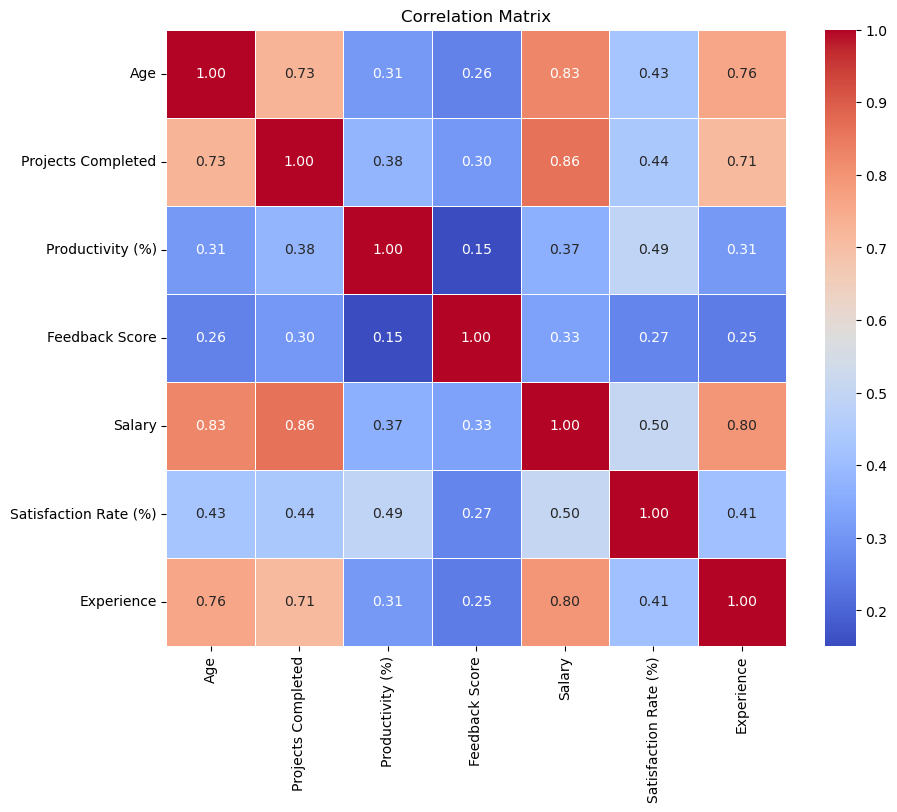

In [4]:
 #Drop non-numeric columns for correlation matrix
numeric_df = df.drop(['Name', 'Gender', 'Department', 'Position'], axis=1)

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Create a heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)

# Show the plot
plt.title('Correlation Matrix')
plt.show()

In [5]:
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Department'] = label_encoder.fit_transform(df['Department'])
df['Position'] = label_encoder.fit_transform(df['Position'])
df.head(10)

,Name,Age,Gender,Projects Completed,Productivity (%),Feedback Score,Department,Position,Salary,Satisfaction Rate (%),Experience
0,Douglas Lindsey,25,1,11,57,2.8,3,0,63596,45,3
1,Anthony Roberson,59,0,19,87,4.7,2,3,112540,94,24
2,Thomas Miller,30,1,8,65,2.4,2,0,66292,43,6
3,Joshua Lewis,26,0,1,3,1.4,3,1,38303,4,1
4,Stephanie Bailey,43,1,14,63,4.5,2,5,101133,97,18
5,Jonathan King,24,1,5,13,2.3,4,2,48740,33,2
6,Kyle Figueroa,33,0,13,92,4.2,4,0,73502,39,5
7,Shannon Allen,23,0,4,9,2.3,1,1,39670,28,2
8,Daryl Noble,22,0,17,32,2.4,3,2,49323,43,4
9,Tracy Figueroa,49,0,7,10,4.6,1,5,92915,67,19


In [6]:
# Extract features and target variable
x = df.drop(['Satisfaction Rate (%)', 'Name'], axis=1)
y = df['Satisfaction Rate (%)']
x.head()

,Age,Gender,Projects Completed,Productivity (%),Feedback Score,Department,Position,Salary,Experience
0,25,1,11,57,2.8,3,0,63596,3
1,59,0,19,87,4.7,2,3,112540,24
2,30,1,8,65,2.4,2,0,66292,6
3,26,0,1,3,1.4,3,1,38303,1
4,43,1,14,63,4.5,2,5,101133,18


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Model Building

Random Forest

In [8]:
# Build a RandomForestRegressor model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_rf = model.predict(x_test)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
print(f'Mean Squared Error: {mse_rf}')

Mean Squared Error: 619.767566


In [9]:
# Perform cross-validation for a more robust evaluation
cv_scores = cross_val_score(model, x, y, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()
print(f'Cross-validated Mean Squared Error: {cv_mse}')

Cross-validated Mean Squared Error: 587.0079969999999


Linear Regression

In [10]:
from sklearn.linear_model import LinearRegression

# Create and train the model
linear_model = LinearRegression()
linear_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_linear = linear_model.predict(x_test)

# Evaluate the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
print(f'Linear Regression Mean Squared Error: {mse_linear}')

Linear Regression Mean Squared Error: 532.1257196919204


In [11]:
coefficients = linear_model.coef_

# Create a DataFrame to store feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': x.columns,  # Assuming X contains your feature columns
    'Coefficient': coefficients
})

# Sort the features by absolute coefficient values in descending order
sorted_coefficients = coefficients_df.reindex(coefficients_df['Coefficient'].abs().sort_values(ascending=False).index)

# Display the sorted coefficients
print(sorted_coefficients)

              Feature  Coefficient
1              Gender    -4.118083
6            Position     1.740692
5          Department    -1.369589
4      Feedback Score     0.495849
3    Productivity (%)     0.335216
8          Experience    -0.179885
2  Projects Completed     0.157773
0                 Age    -0.034742
7              Salary     0.000325


Decision Tree

In [12]:
from sklearn.tree import DecisionTreeRegressor

# Create and train the model
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)

# Make predictions on the test set
y_pred_dt = dt_model.predict(x_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_pred_dt)
print(f'Decision Tree Mean Squared Error: {mse_dt}')

Decision Tree Mean Squared Error: 779.12


Support Vector Machine

In [13]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Assuming X_scaled and y are your features and target variable, respectively
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.25, random_state=42)

# Create and train the model
svm_model = SVR()
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm_model.predict(X_test)

# Evaluate the model
mse_svm = mean_squared_error(y_test, y_pred_svm)
print(f'SVM Mean Squared Error: {mse_svm}')

SVM Mean Squared Error: 632.2383850037646


Neural Netwrok

In [14]:
from sklearn.neural_network import MLPRegressor

# Create and train the model
nn_model = MLPRegressor(hidden_layer_sizes=(100, 50), max_iter=10000, random_state=42)
nn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_nn = nn_model.predict(X_test)

# Evaluate the model
mse_nn = mean_squared_error(y_test, y_pred_nn)
print(f'Neural Network Mean Squared Error: {mse_nn}')

Neural Network Mean Squared Error: 979.2189972115641


# Model Comparison

Mean Square Error

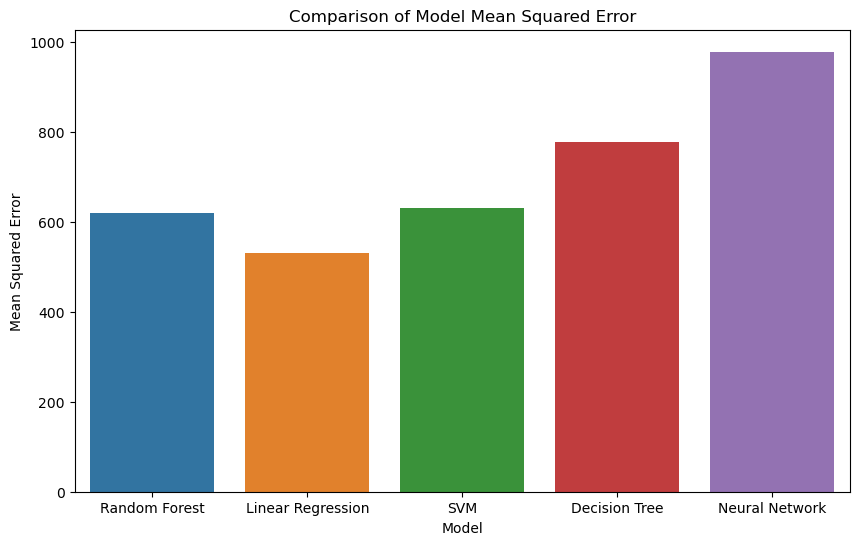

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame to store MSE values
results_df = pd.DataFrame({
    'Model': ['Random Forest','Linear Regression', 'SVM', 'Decision Tree', 'Neural Network'],
    'MSE': [mse_rf,mse_linear, mse_svm, mse_dt, mse_nn]
})

# Plot the MSE values
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Comparison of Model Mean Squared Error')
plt.xlabel('Model')
plt.ylabel('Mean Squared Error')
plt.show()

R-Squared

In [16]:
from sklearn.metrics import r2_score

# Calculate R-squared for each model
r2_rf = r2_score(y_test, y_pred_rf)
r2_linear = r2_score(y_test, y_pred_linear)
r2_svm = r2_score(y_test, y_pred_svm)
r2_dt = r2_score(y_test, y_pred_dt)
r2_nn = r2_score(y_test, y_pred_nn)

# Add R-squared values to the results DataFrame
results_df['R-squared'] = [r2_rf,r2_linear, r2_svm, r2_dt, r2_nn]

Text(0.5, 1.0, 'Comparison of R-squared Score')

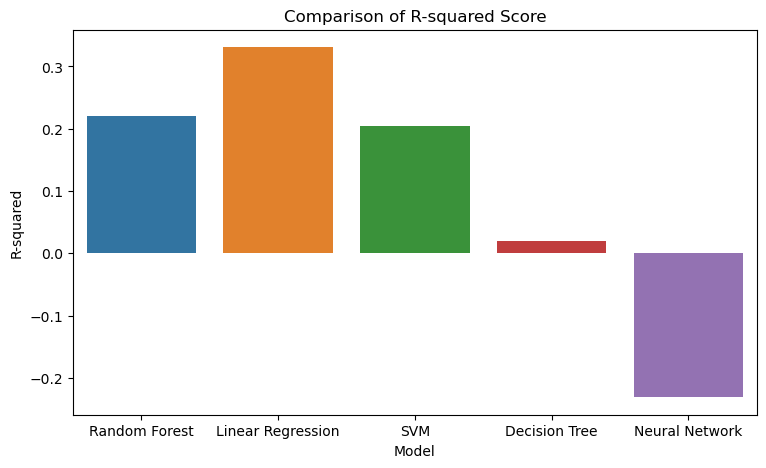

In [17]:
# Plot the additional performance metrics
plt.figure(figsize=(30, 5))

# R-squared
plt.subplot(1, 3, 1)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('Comparison of R-squared Score')


Mean Absolute Error(MAE)

Text(0.5, 1.0, 'Comparison of Mean Absolute Error (MAE)')

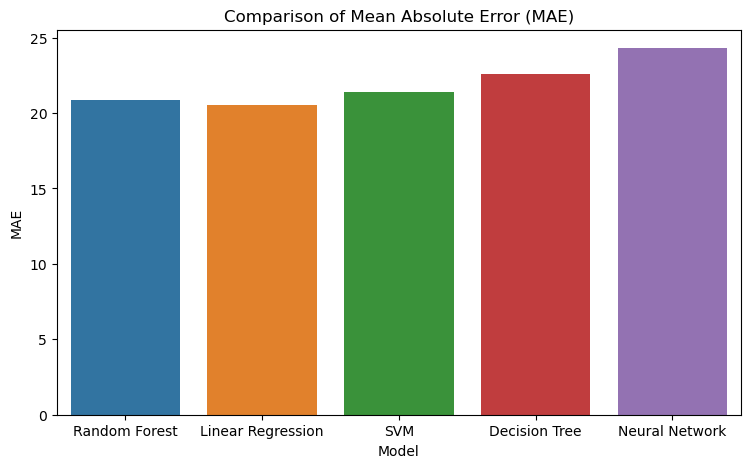

In [18]:
from sklearn.metrics import mean_absolute_error

# Calculate MAE for each model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mae_nn = mean_absolute_error(y_test, y_pred_nn)

# Add MAE values to the results DataFrame
results_df['MAE'] = [mae_rf,mae_linear, mae_svm, mae_dt, mae_nn]

# Plot the additional performance metrics
plt.figure(figsize=(30, 5))

# Mean Absolute Error (MAE) plot
plt.subplot(1,3,2)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Comparison of Mean Absolute Error (MAE)')


Explained Variance Score

Text(0.5, 1.0, 'Comparison of Explained Variance Score')

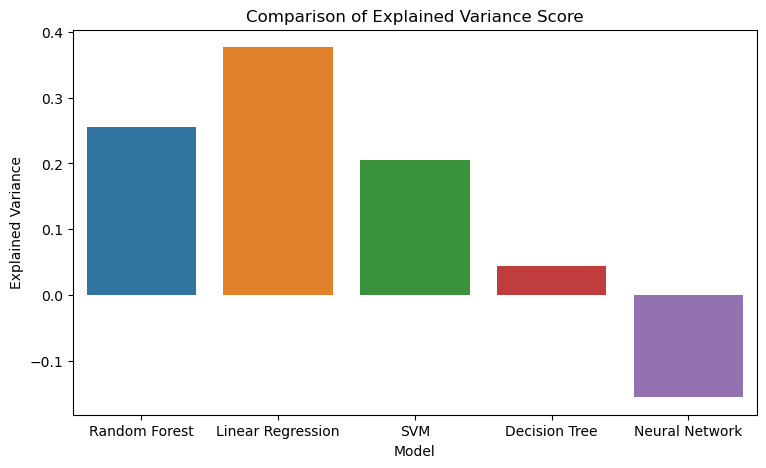

In [19]:
from sklearn.metrics import explained_variance_score

# Calculate Explained Variance Score for each model
evs_rf = explained_variance_score(y_test, y_pred_rf)
evs_linear = explained_variance_score(y_test, y_pred_linear)
evs_svm = explained_variance_score(y_test, y_pred_svm)
evs_dt = explained_variance_score(y_test, y_pred_dt)
evs_nn = explained_variance_score(y_test, y_pred_nn)

# Plot the additional performance metrics
plt.figure(figsize=(30, 5))

# Add Explained Variance Score values to the results DataFrame
results_df['Explained Variance'] = [evs_rf,evs_linear, evs_svm, evs_dt, evs_nn]

# Explained Variance Score
plt.subplot(1, 3, 3)
sns.barplot(x='Model', y='Explained Variance', data=results_df)
plt.title('Comparison of Explained Variance Score')

               Model         MSE  R-squared        MAE  Explained Variance
0      Random Forest  619.767566   0.220762  20.855800            0.255187
1  Linear Regression  532.125720   0.330954  20.540200            0.376330
2                SVM  632.238385   0.205082  21.387237            0.205729
3      Decision Tree  779.120000   0.020407  22.560000            0.043871
4     Neural Network  979.218997  -0.231179  24.310106           -0.154626


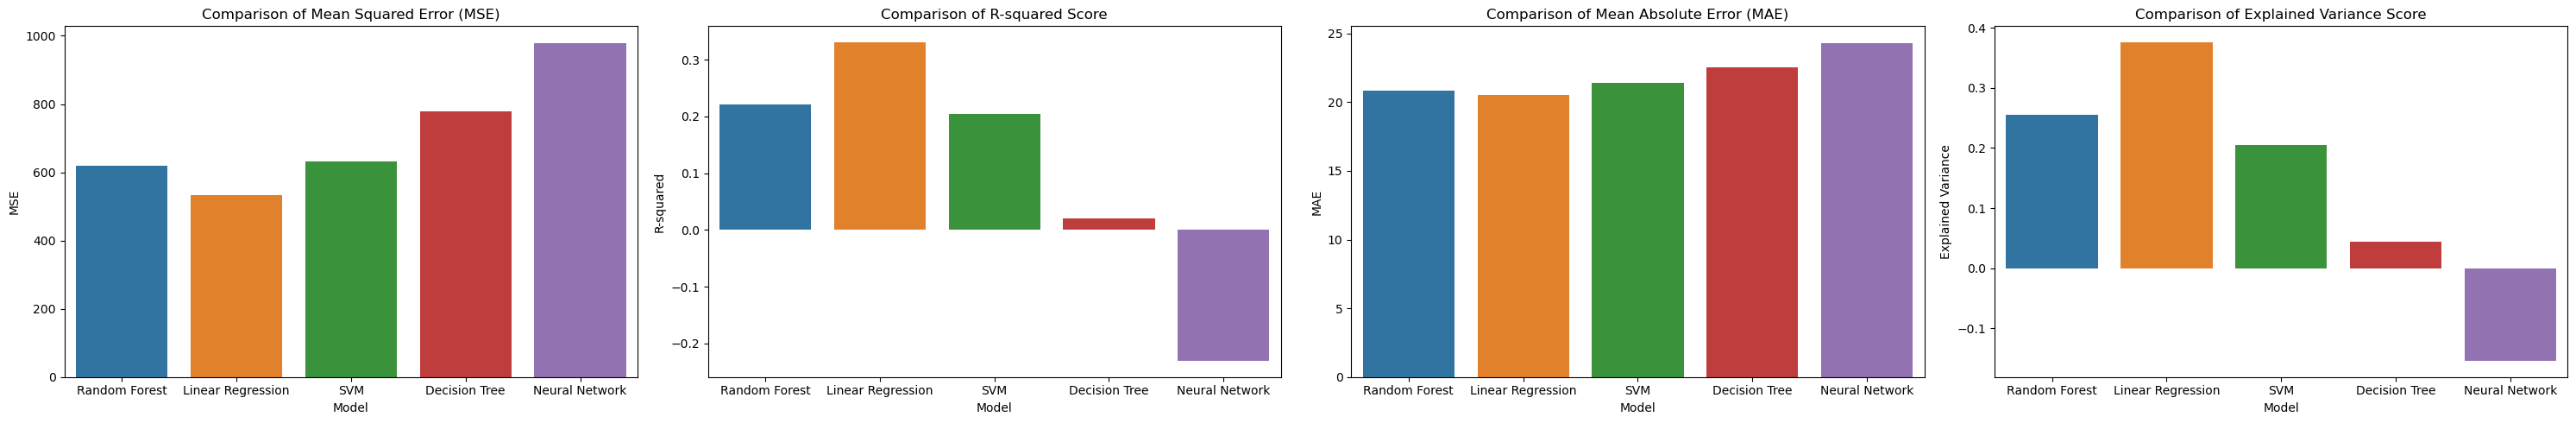

In [20]:
# Display the results DataFrame
print(results_df)

# Plot the performance metrics
plt.figure(figsize=(30, 5))

# MSE
plt.subplot(1, 4, 1)
sns.barplot(x='Model', y='MSE', data=results_df)
plt.title('Comparison of Mean Squared Error (MSE)')

# R-squared
plt.subplot(1, 4, 2)
sns.barplot(x='Model', y='R-squared', data=results_df)
plt.title('Comparison of R-squared Score')

# Mean Absolute Error (MAE)
plt.subplot(1, 4, 3)
sns.barplot(x='Model', y='MAE', data=results_df)
plt.title('Comparison of Mean Absolute Error (MAE)')

# Explained Variance Score
plt.subplot(1, 4, 4)
sns.barplot(x='Model', y='Explained Variance', data=results_df)
plt.title('Comparison of Explained Variance Score')

plt.tight_layout()
plt.show()
